In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
from lmfit import Model

In [89]:
specific_rows = [9,10]

df = pd.read_csv('first_results.csv', header=None, usecols=[9,10])

df

,9,10
0,0.05160,2.42
1,0.05164,2.42
2,0.05168,2.40
3,0.05172,2.40
4,0.05176,2.40
...,...,...
2495,0.15140,1.64
2496,0.15144,1.66
2497,0.15148,1.64
2498,0.15152,1.64


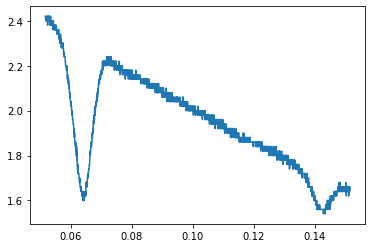

In [90]:
plt.plot(df[9], df[10])

In [91]:
# Fit functions

def LinFunc(x, a, b):
    y = a*x+b
    return y
    
def gaussian1(x, amp1, cen1, wid1):
    return amp1 * np.exp(-(x-cen1)**2 / wid1)

def gaussian2(x, amp2, cen2, wid2):
    return amp2 * np.exp(-(x-cen2)**2 / wid2)

Lin_model = Model(LinFunc)
gauss_model_1 = Model(gaussian1)
gauss_model_2 = Model(gaussian2)

tot_model = Lin_model + gauss_model_1 + gauss_model_2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')





parameter names: ['a', 'b', 'amp1', 'cen1', 'wid1', 'amp2', 'cen2', 'wid2']
independent variables: ['x']


In [92]:
#Calculate some params

a = (df[10][0]-df[10][len(df[10])-1])/(df[9][0]-df[9][len(df[10])-1])

b = 2.5

[[Model]]
    Model(LinFunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 2500
    # variables        = 2
    chi-square         = 44.6296587
    reduced chi-square = 0.01786616
    Akaike info crit   = -10060.1184
    Bayesian info crit = -10048.4704
    R-squared          = 0.61622098
[[Variables]]
    a: -5.86489273 +/- 0.09260538 (1.58%) (init = -7.60304)
    b:  2.53775574 +/- 0.00977933 (0.39%) (init = 2.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.962


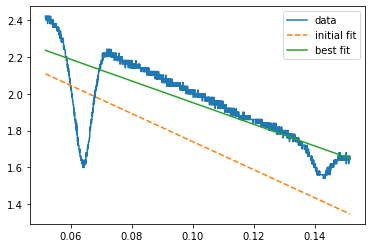

In [100]:
lin_fit = Lin_model.fit(df[10], x=df[9], a=a, b=b)

print(lin_fit.fit_report())


plt.plot(df[9], df[10], label='data')
plt.plot(df[9], lin_fit.init_fit, '--', label='initial fit')
plt.plot(df[9], lin_fit.best_fit, '-', label='best fit')
plt.legend()

In [ ]:
params = tot_model.make_params(a=a, b=b, )
result = tot_model.fit(y=df[10], x=df[9])

SyntaxError: invalid syntax (916294036.py, line 1)